In [12]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords




In [2]:
# Chemin vers votre fichier JSON
chemin_fichier_json = "/Users/adambenabou/Downloads/airbus-helicopters-hackathon-toolkit/data/airbus_helicopters_train_set.json"

# Ouvrir le fichier JSON en mode lecture
with open(chemin_fichier_json, 'r', encoding='utf-8') as fichier:
    corpus = json.load(fichier)


In [3]:
# Votre code pour le traitement des données
longueurs_textes = [len(exemple["original_text"].split()) for exemple in corpus.values()]
longueurs_resumes = [len(exemple["reference_summary"].split()) for exemple in corpus.values()]

moyenne_textes = sum(longueurs_textes) / len(longueurs_textes)
moyenne_resumes = sum(longueurs_resumes) / len(longueurs_resumes)

taux_resumes = [len(exemple["reference_summary"].split()) / len(exemple["original_text"].split()) for exemple in corpus.values()]


In [6]:
print(moyenne_textes)
print(moyenne_resumes)

53.743341404358354
28.694915254237287


In [4]:
data = pd.DataFrame({
    'Longueur Texte': longueurs_textes,
    'Longueur Résumé': longueurs_resumes
})


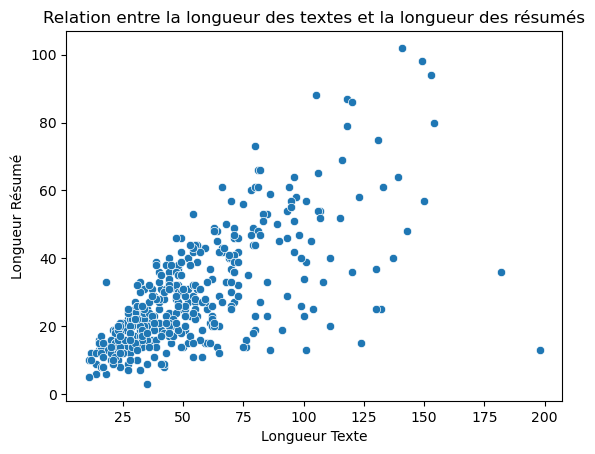

In [14]:
# Création du scatter plot
sns.scatterplot(data=data, x='Longueur Texte', y='Longueur Résumé')

# Ajout d'un titre au graphique
plt.title('Relation entre la longueur des textes et la longueur des résumés')

# Affichage du graphique
plt.show()


In [15]:
stop_words = set(stopwords.words('english'))


In [16]:
mots_textes = [mot for exemple in corpus.values() for mot in exemple["original_text"].lower().split() if mot not in stop_words]
mots_resumes = [mot for exemple in corpus.values() for mot in exemple["reference_summary"].lower().split() if mot not in stop_words]


In [17]:
frequence_textes = Counter(mots_textes)
frequence_resumes = Counter(mots_resumes)

In [19]:
# Identification des mots communs entre textes et résumés
mots_communs = set(frequence_textes.keys()) & set(frequence_resumes.keys())

# Filtration pour ne garder que les mots significatifs (optionnel, basé sur votre critère, par exemple fréquence minimale)
mots_significatifs = {mot for mot in mots_communs if frequence_textes[mot] > 1 and frequence_resumes[mot] > 1}

# Affichage de quelques mots communs significatifs
print(f"Quelques mots communs significatifs : {list(mots_significatifs)[:30]}")


Quelques mots communs significatifs : ['administrative', 'necessary', 'agree', 'incoterms', 'price', 'caused', 'collection', 'also', 'tests.', 'performed', 'amount', 'assigns', 'charges', 'saas,', 'assembly', 'airworthy', 'disclosed', 'airworthiness', 'payments', '(or', 'suspend', 'cases,', 'inspection,', 'next', 'remains', 'except', 'purchaser,', 'end', 'implement', 'rate']
